In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-prediction-dataset/Traffic.csv
/kaggle/input/traffic-prediction-dataset/TrafficTwoMonth.csv


# 📁 About the Dataset

Traffic congestion and related problems are a common concern in urban areas. Understanding traffic patterns and analyzing data can provide valuable insights for transportation planning, infrastructure development, and congestion management.

# What exactly is this dataset and how was it created?

It is a valuable resource for studying traffic conditions as it contains information collected by a computer vision model. The model detects four classes of vehicles: cars, bikes, buses, and trucks. The dataset is stored in a CSV file and includes additional columns such as time in hours, date, days of the week, and counts for each vehicle type (CarCount, BikeCount, BusCount, TruckCount). The "Total" column represents the total count of all vehicle types detected within a 15-minute duration.

The dataset is updated every 15 minutes, providing a comprehensive view of traffic patterns over the course of one month. Additionally, the dataset includes a column indicating the traffic situation categorized into four classes: 1-Heavy, 2-High, 3-Normal, and 4-Low. This information can help assess the severity of congestion and monitor traffic conditions at different times and days of the week.

# In what cases can it be useful?

The dataset is useful in transportation planning, congestion management, and traffic flow analysis. It helps understand vehicle demand, identify congested areas, and inform infrastructure improvements. The dataset enables targeted interventions like signal optimizations and lane adjustments. It allows researchers to study traffic patterns by hour, day, or specific dates and explore correlations with external factors. It supports transportation research on vehicle relationships and traffic behavior. Urban planners can assess traffic impact for zoning and infrastructure decisions. Overall, the dataset empowers stakeholders to make data-driven decisions, enhance urban mobility, and create efficient and sustainable cities.

# Import Libraries¶

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

**➡️At first, we import nessesary python liblaries**

# Read Dataset

In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('/kaggle/input/traffic-prediction-dataset/Traffic.csv')
train 

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


**➡️ Here, we import data from a csv file, with pandas** 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(train,test_size=0.1,random_state=1992)
print("Shape of train: ",train.shape)
print("Shape of test",test.shape)

Shape of train:  (2678, 9)
Shape of test (298, 9)


**➡️ before the data is processed ,Split train data and test data ,The accuracy of the final prediction is more realistic.**

# Visualization

In [7]:
train.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

**➡️ train and test dataset is no Missing values in DataFrame.**

In [8]:
print('train')
display(train.info())
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
Index: 2678 entries, 828 to 2313
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2678 non-null   object
 1   Date               2678 non-null   int64 
 2   Day of the week    2678 non-null   object
 3   CarCount           2678 non-null   int64 
 4   BikeCount          2678 non-null   int64 
 5   BusCount           2678 non-null   int64 
 6   TruckCount         2678 non-null   int64 
 7   Total              2678 non-null   int64 
 8   Traffic Situation  2678 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.2+ KB


None

test
<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 1338 to 896
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               298 non-null    object
 1   Date               298 non-null    int64 
 2   Day of the week    298 non-null    object
 3   CarCount           298 non-null    int64 
 4   BikeCount          298 non-null    int64 
 5   BusCount           298 non-null    int64 
 6   TruckCount         298 non-null    int64 
 7   Total              298 non-null    int64 
 8   Traffic Situation  298 non-null    object
dtypes: int64(6), object(3)
memory usage: 23.3+ KB


None

**➡️ train and test dataset are no-null values.**

**➡️ We also can see that 「Time」、「Day of the week」、「Traffic Situation」 are object and must do the conversion.**

<Axes: xlabel='Time', ylabel='Count'>

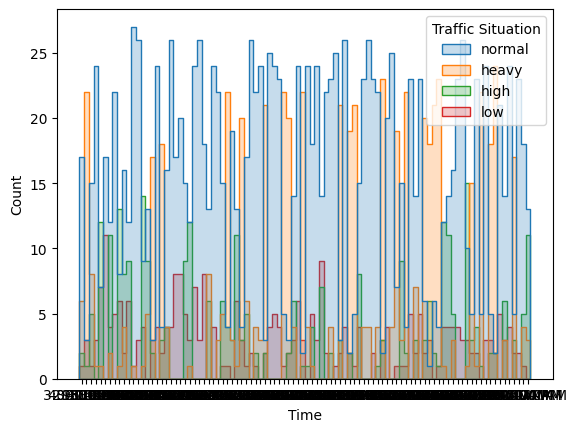

In [9]:
import seaborn as sns

sns.histplot(train, x="Time", hue="Traffic Situation", element="step")

<Axes: xlabel='Date', ylabel='Count'>

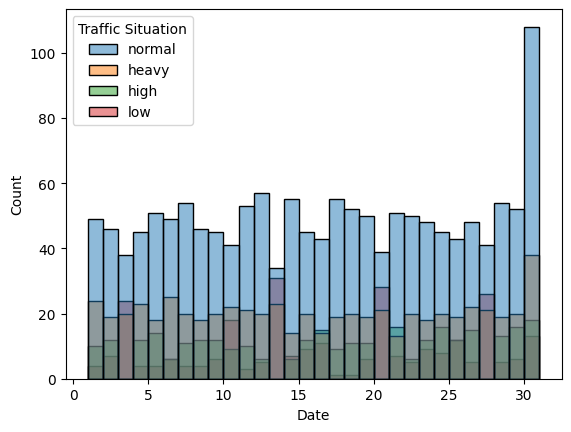

In [10]:
sns.histplot(train, x="Date", hue="Traffic Situation", bins=30)

In [11]:
import matplotlib.pyplot as plt

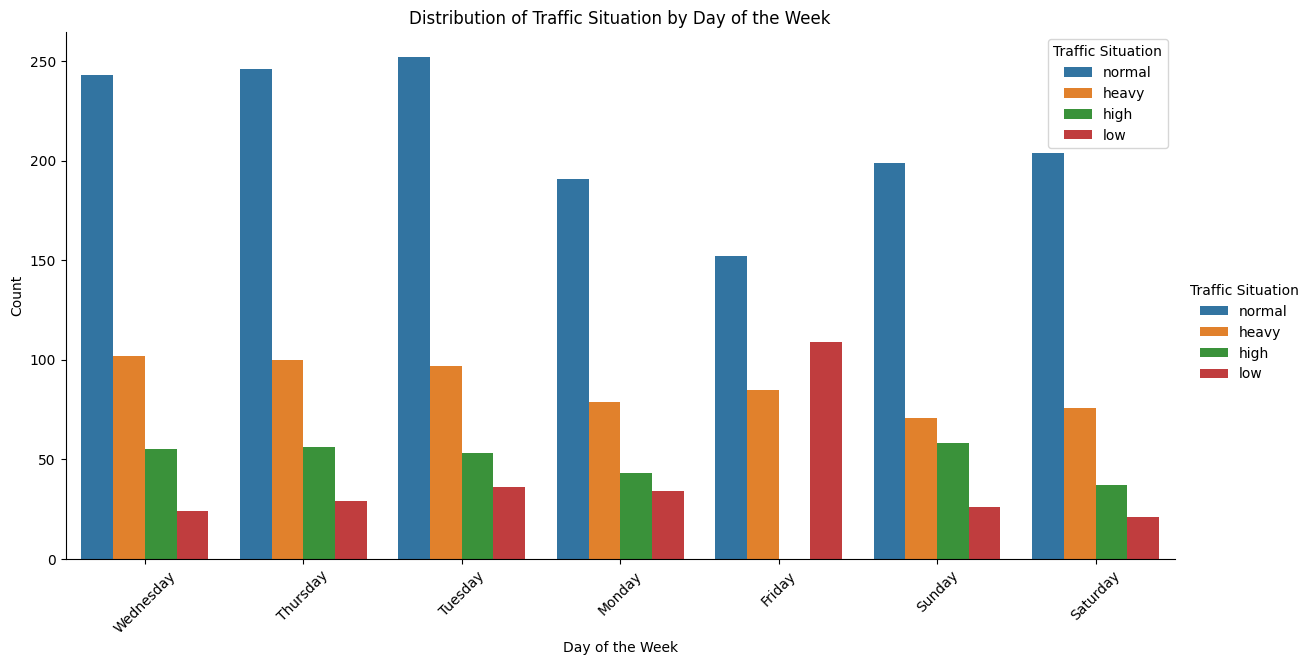

In [12]:
# Create a count plot to show the distribution of traffic situations by day of the week
sns.catplot(
    data=train,
    x='Day of the week',        # X-axis represents the day of the week
    hue='Traffic Situation',    # Color by traffic situation
    kind='count',               # Use count plot to show the number of occurrences
    palette='tab10',            # Select a color palette
    height=6,                   # Set the height of the plot
    aspect=2                    # Set the aspect ratio (width/height)
)

# Add title and labels to the plot
plt.title('Distribution of Traffic Situation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)        # Rotate x-axis labels for better readability
plt.legend(title='Traffic Situation')  # Add legend with title
plt.show()                    # Display the plot

<Axes: xlabel='CarCount', ylabel='Count'>

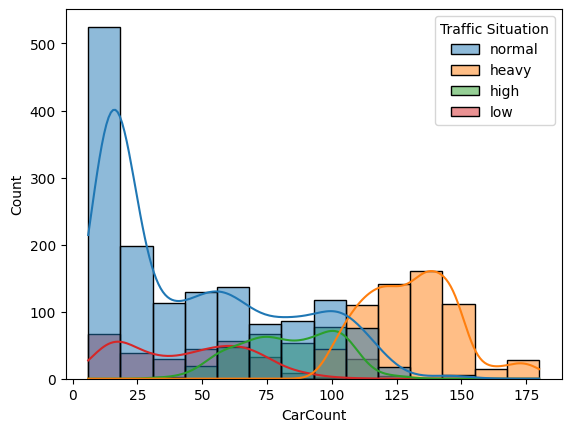

In [13]:
import seaborn as sns
sns.histplot(train,x='CarCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='BikeCount', ylabel='Count'>

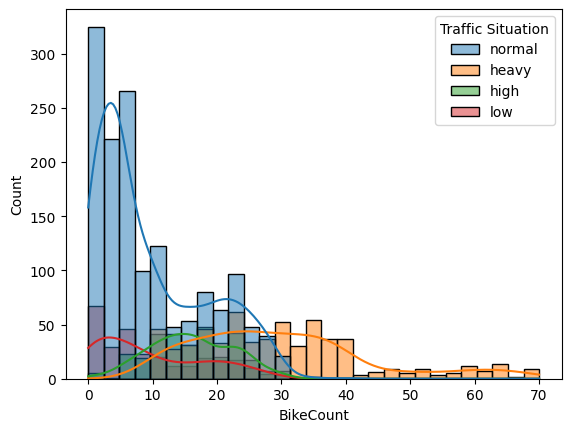

In [14]:
sns.histplot(train,x='BikeCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='BusCount', ylabel='Count'>

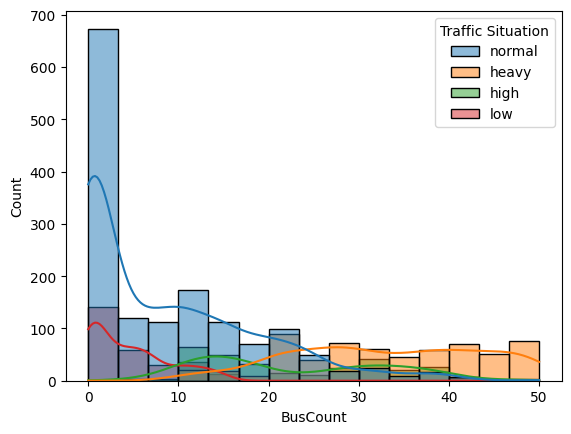

In [15]:
sns.histplot(train,x='BusCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='TruckCount', ylabel='Count'>

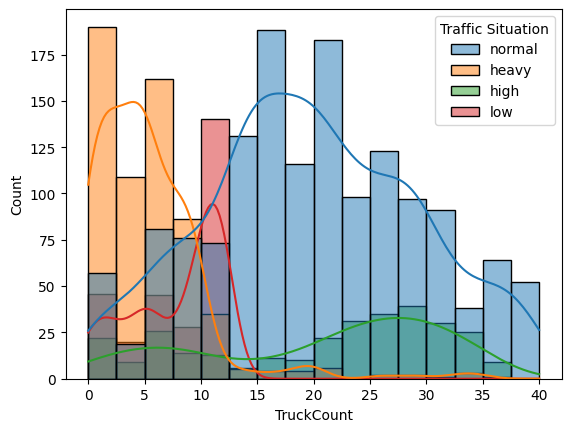

In [16]:
sns.histplot(train,x='TruckCount',hue='Traffic Situation',kde=True)

<Axes: xlabel='Total', ylabel='Count'>

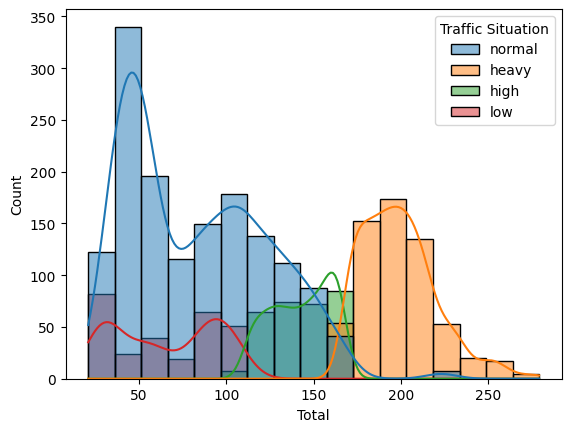

In [17]:
sns.histplot(train,x='Total',hue='Traffic Situation',kde=True)

**➡️ Visualize the relationship between each feature and target.**

# Preprocessing

<Axes: xlabel='Traffic Situation', ylabel='count'>

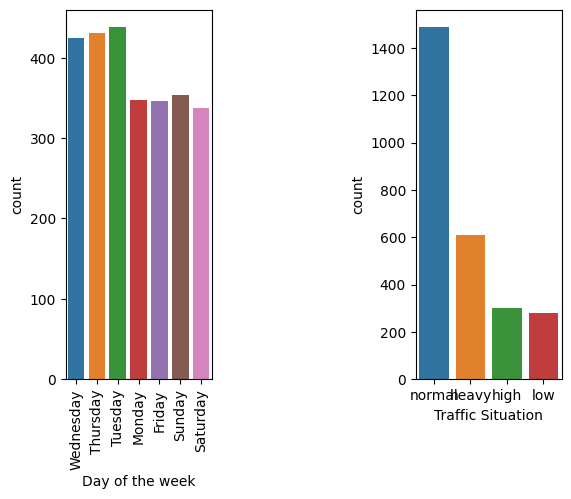

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... your other code

plt.subplot(1, 3, 1)
sns.countplot(x=train["Day of the week"])
plt.xticks(rotation=90)  # Directly use plt.xticks

plt.subplot(1, 3, 3)
sns.countplot(x=train["Traffic Situation"])

# ... other plot customizations

In [19]:
import pandas as pd

df_temp=train
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
train=df_temp
train


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
828,3:00:00 PM,18,3,14,16,9,14,53,1
929,4:15:00 PM,19,4,104,31,37,6,178,3
2170,2:30:00 PM,1,3,91,22,34,8,155,2
2702,3:30:00 AM,7,2,18,2,1,27,48,1
2676,9:00:00 PM,6,1,105,14,13,32,164,2
...,...,...,...,...,...,...,...,...,...
1921,12:15:00 AM,30,1,19,2,0,22,43,1
229,9:15:00 AM,12,4,24,18,37,18,97,1
1835,2:45:00 AM,29,7,19,2,1,12,34,0
2216,2:00:00 AM,2,4,12,3,0,39,54,1


# Feature Selection

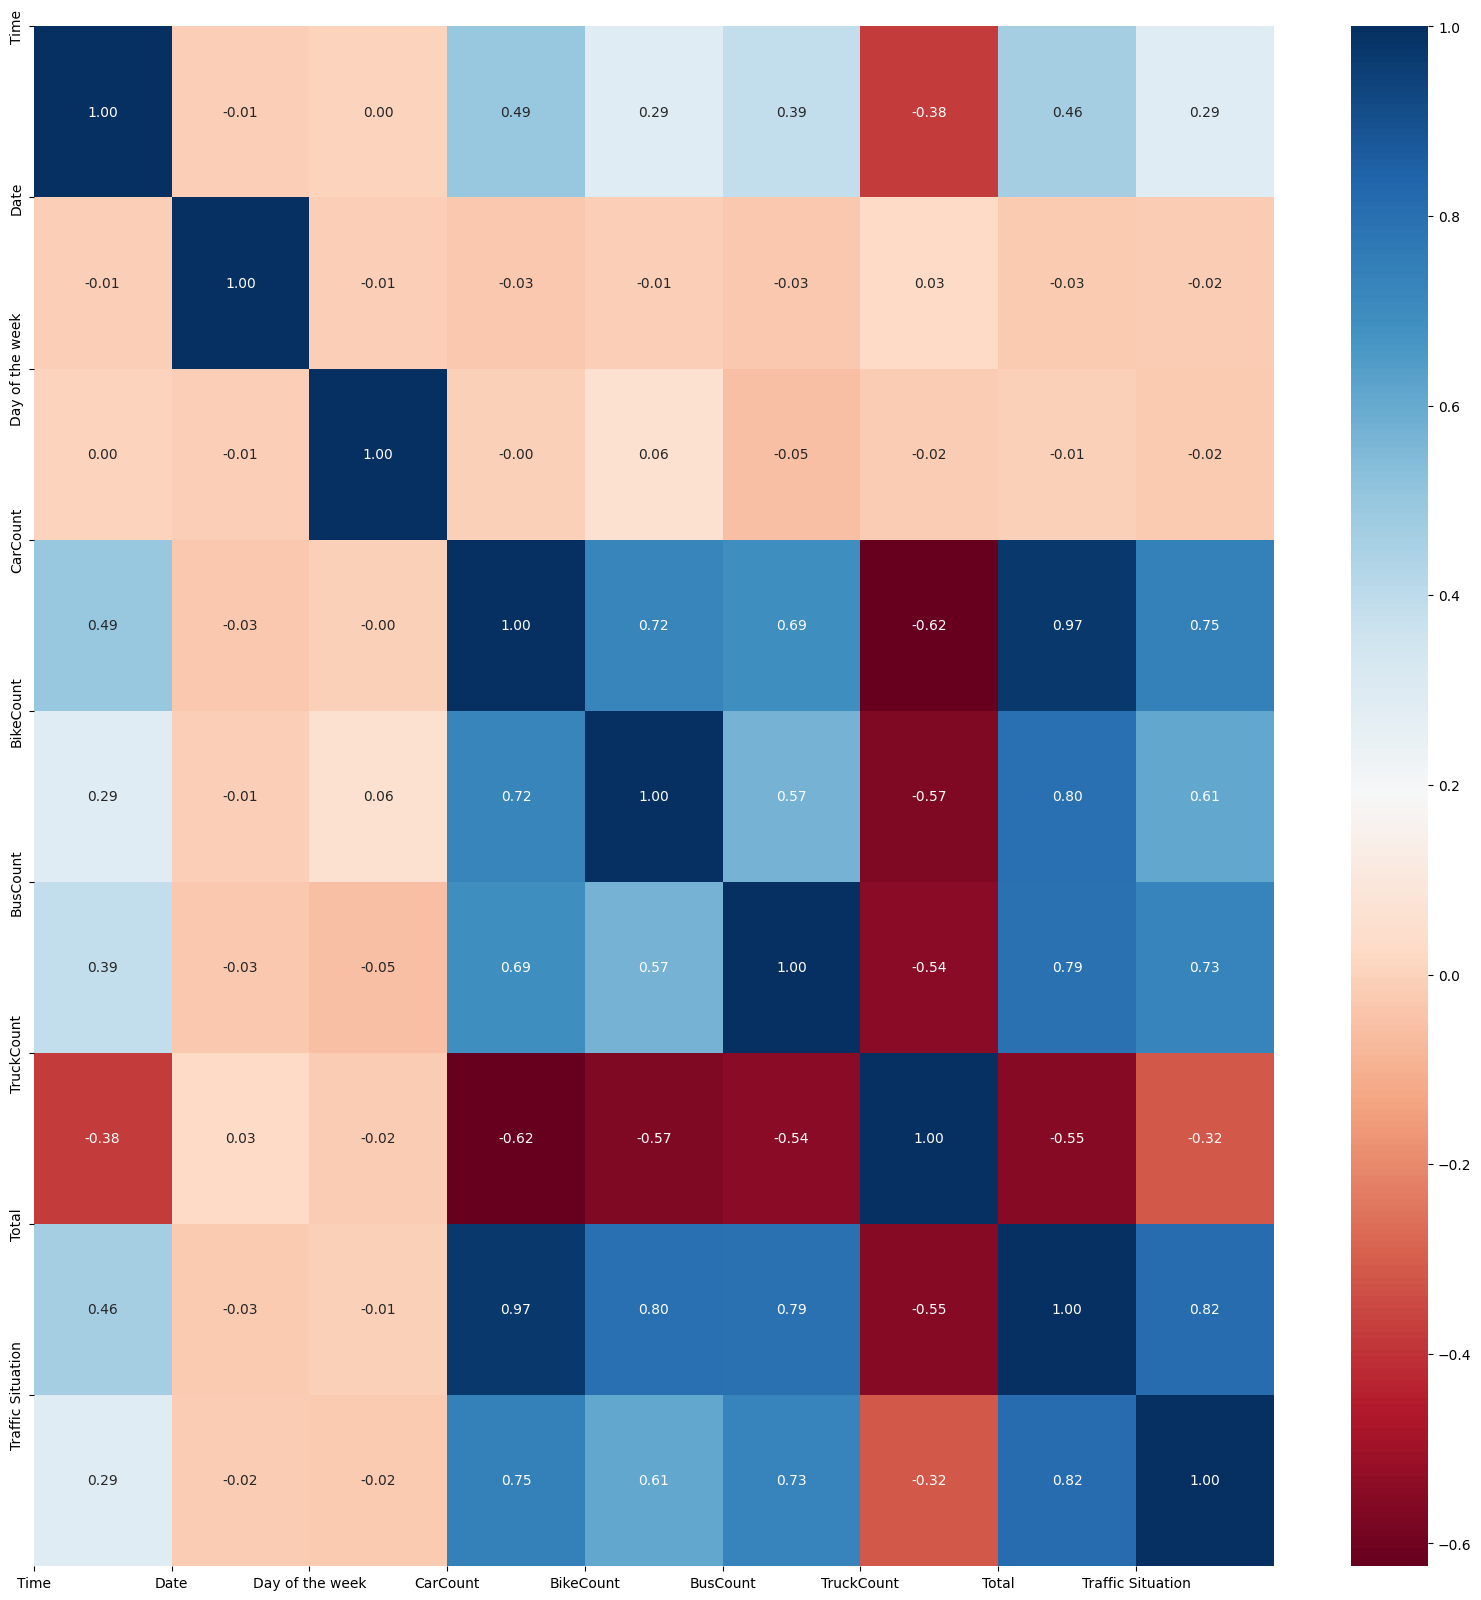

In [20]:
train_temp=train

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_temp['Time'] = le.fit_transform(train_temp['Time'])

corr = train_temp.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

**➡️ We use Heatmap to find relations between features.**

**Most related features :
Total : 0.82
TruckCount : -0.32**

XGBClassifie: 
 [1.8394163e-03 3.7277141e-04 1.7649922e-04 1.5505096e-02 7.1617216e-03
 1.6866037e-01 2.6005638e-01 5.4622775e-01]


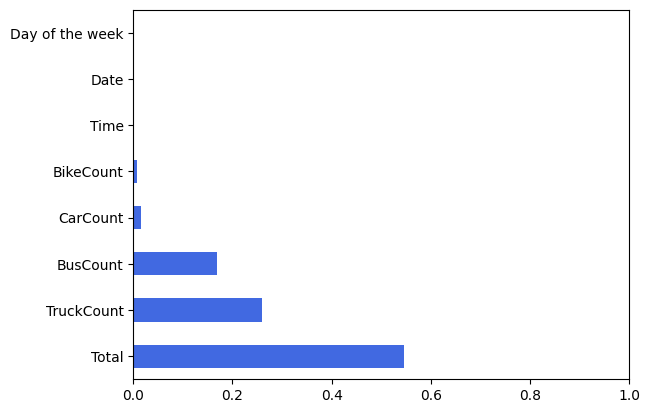

In [21]:
from xgboost import XGBClassifier
X_data_feature= train.drop(columns=['Traffic Situation'],axis=1)
y_data_feature= train['Traffic Situation']

model = [XGBClassifier()]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 1.0)
    plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 2678, number of used features: 8
[LightGBM] [Info] Start training from score -2.261614
[LightGBM] [Info] Start training from score -0.588310
[LightGBM] [Info] Start training from score -2.182399
[LightGBM] [Info] Start training from score -1.479367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

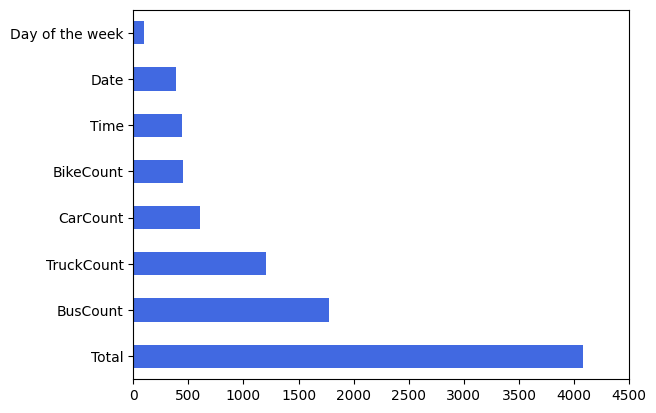

In [22]:
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMClassifier

model = [LGBMClassifier()]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 4500)
    plt.show()
    force_col_wise=True,
    force_row_wise=True

<catboost.co: 
 [ 1.46469851  0.43155772  0.31474545  1.92798683  0.63489931 17.78527162
 37.97612781 39.46471275]


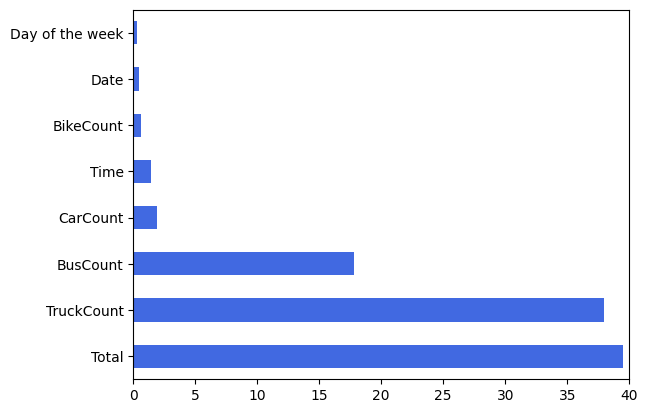

In [23]:
from catboost import CatBoostClassifier

model = [CatBoostClassifier(logging_level='Silent')]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 40)
    plt.show()

**➡️ To summarize the above three features important to judge, 「Day of the week」and「Date」columns can be removed.**

In [24]:
train = train.drop(columns=["Day of the week","Date"],axis=1)
train

,Time,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
828,41,14,16,9,14,53,1
929,51,104,31,37,6,178,3
2170,37,91,22,34,8,155,2
2702,44,18,2,1,27,48,1
2676,89,105,14,13,32,164,2
...,...,...,...,...,...,...,...
1921,18,19,2,0,22,43,1
229,90,24,18,37,18,97,1
1835,38,19,2,1,12,34,0
2216,32,12,3,0,39,54,1


In [25]:
X= train.drop(columns=["Traffic Situation"],axis=1)
y= train["Traffic Situation"]


In [26]:
X_train=X
y_train=y

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5
0,-0.248684,-1.200271,0.082850,-0.442325,-0.123578,-1.023389
1,0.113949,0.767295,1.253470,1.510645,-0.877003,1.056847
2,-0.393737,0.483091,0.551098,1.301398,-0.688647,0.674083
3,-0.139894,-1.112824,-1.009729,-1.000316,1.100737,-1.106598
4,1.491955,0.789157,-0.073233,-0.163329,1.571628,0.823860
...,...,...,...,...,...,...
2673,-1.082740,-1.090962,-1.009729,-1.070065,0.629847,-1.189808
2674,1.528218,-0.981653,0.238932,1.510645,0.253134,-0.291146
2675,-0.357474,-1.090962,-1.009729,-1.000316,-0.311934,-1.339584
2676,-0.575054,-1.243995,-0.931688,-1.070065,2.230875,-1.006747


**➡️ Standardize all features, i.e. Gaussian distribution. The mean of the data is 0 and the variance is 1.The appropriate time to use standardization is when the variance of some features is too large, so that the model can be converged quickly.**

**➡️ You can also try the other Normization methods. Ex.RobustScaler、MinMaxScaler、Normalizer👍**

**Target distribution**

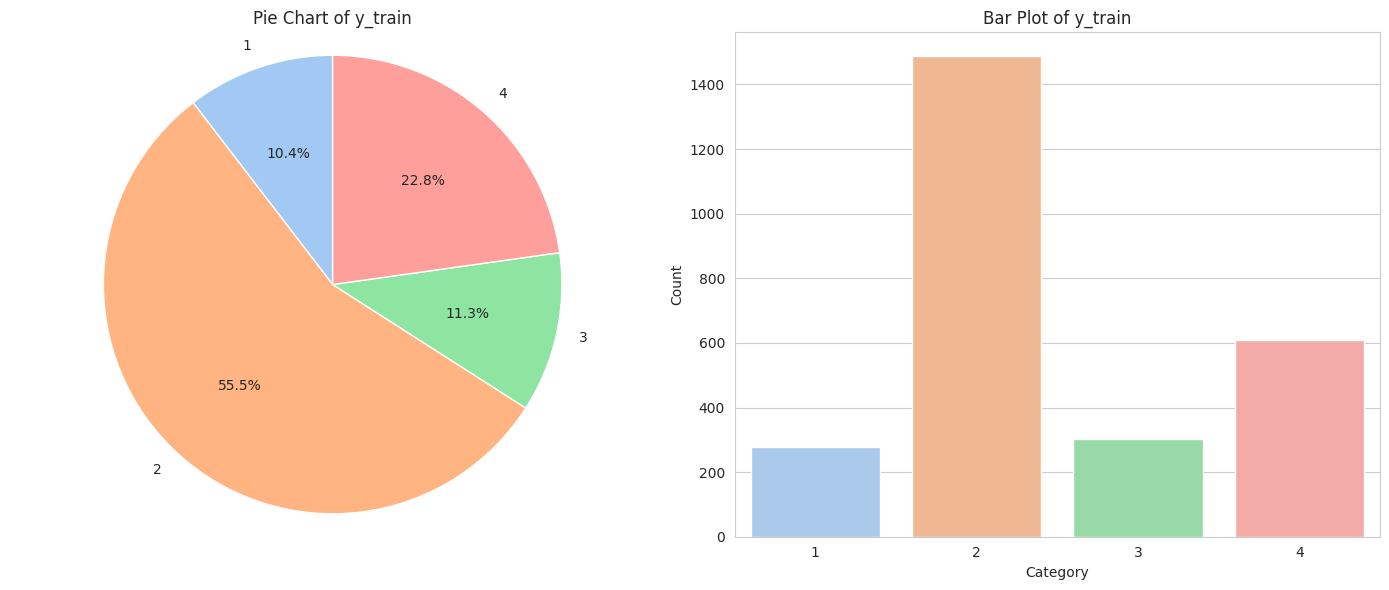

Skewness: 0.527934
Kurtosis: -0.860804


In [27]:
# Compute frequency counts
counts = np.bincount(y_train)

# Define labels for the plots
class_labels = ['1', '2', '3', '4']
labels = [class_labels[i] for i in range(len(counts))]

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure and axis for the subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart
axs[0].pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel', len(labels))
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axs[0].set_title('Pie Chart of y_train')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Bar Plot
sns.barplot(x=labels, y=counts, palette='pastel', ax=axs[1])
axs[1].set_title('Bar Plot of y_train')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

**➡️ Visualizing the distribution of targets**

# Split Dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (2142, 6)
Shape of X_eval:  (536, 6)
Shape of y_train:  (2142,)
Shape of y_eval (536,)


In [29]:
y_train =pd.DataFrame(y_train)
y_eval =pd.DataFrame(y_eval)

**➡️ Splitting training and evaluation datasets.**

# VotingClassifier


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [31]:
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier()
clf2 = SGDClassifier()
clf3 = XGBClassifier()
clf4 = RandomForestClassifier()
clf5 = ExtraTreesClassifier()
clf6 = CatBoostClassifier(logging_level='Silent')
clf7 = KNeighborsClassifier()
clf8 = LogisticRegression()
clf9=  RidgeClassifier()
clf10= HistGradientBoostingClassifier()
clf11= BaggingClassifier()
clf12= GradientBoostingClassifier()
clf13= GaussianNB()
clf14= LGBMClassifier()
clf15= DummyClassifier()
clf16= SVC()

eclf = VotingClassifier(estimators=[('ADA', clf1), ('SGD', clf2), ('XGB', clf3), ('RF', clf4), ('ET', clf5), ('CAT', clf6), ('KN', clf7),
                                   ('LG', clf8), ('RC', clf9), ('HBC', clf10), ('BC', clf11), ('GBC', clf12), ('GNB', clf13), 
                                    ('LGBM', clf14),('DC', clf15),('SVC', clf16)],voting='hard')

for clf, label in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12,clf13,clf14,clf15,clf16], 
                      ['ADA', 'SGD','XGB','RF','ET','CAT','KN','LG','RC','HBC','BC','GBC','GNB','LGBM','DC','SVC']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    force_col_wise=True

Accuracy: 0.55 (+/- 0.00) [ADA]
Accuracy: 0.86 (+/- 0.00) [SGD]
Accuracy: 1.00 (+/- 0.00) [XGB]
Accuracy: 1.00 (+/- 0.00) [RF]
Accuracy: 0.98 (+/- 0.01) [ET]
Accuracy: 1.00 (+/- 0.00) [CAT]
Accuracy: 0.93 (+/- 0.01) [KN]
Accuracy: 0.90 (+/- 0.02) [LG]
Accuracy: 0.77 (+/- 0.01) [RC]
Accuracy: 1.00 (+/- 0.00) [HBC]
Accuracy: 1.00 (+/- 0.00) [BC]
Accuracy: 1.00 (+/- 0.00) [GBC]
Accuracy: 0.81 (+/- 0.02) [GNB]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 6
[LightGBM] [Info] Start training from score -2.220255
[LightGBM] [Info] Start training from score -0.596935
[LightGBM] [Info] Start training from score -2.183311
[LightGBM] [Info] Start training from score -1.477294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

**➡️remove ADA、SGD、KN、LG、RC、GNB、DC、SVC , you also can remove the ET model , because it don't accuracy 100%.**

# StackingClassifier

**➡️ I use VotingClassifier to select models and stackingclassifier for final prediction.**

In [32]:
class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_
        ])
        return self.meta_model_.predict(meta_features)

In [33]:
stacked_averaged_models = StackingAveragedModels(base_models = (clf3,clf4,clf5,clf10,clf11,clf12,clf14),meta_model = clf6)

**➡️ base model : XGB、RF、ET、HBC、BC、GBC、LGBM ; meta model : CAT**

In [34]:
stacking_model=stacked_averaged_models.fit(X_train.values, y_train.values)
force_col_wise=True,
force_row_wise=True

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 6
[LightGBM] [Info] Start training from score -2.209560
[LightGBM] [Info] Start training from score -0.580110
[LightGBM] [Info] Start training from score -2.198977
[LightGBM] [Info] Start training from score -1.516412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 1713, number of used features: 6
[LightGBM] [Info] Start training from score -2.209560
[LightGBM] [Info] Start training from score -0.580110
[LightGBM] [Info] Start training from score -2.198977
[LightGBM] [Info] Start training from score -1.516412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

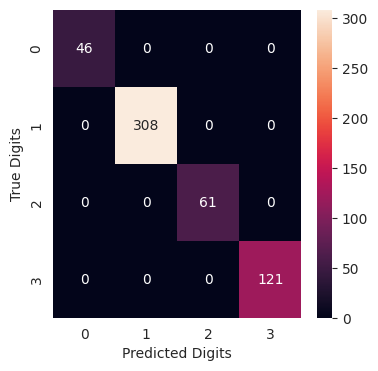

In [35]:
stacking_model.fit(X_train.values , y_train.values)
y_pred_stacking = stacking_model.predict(X_eval.values) 
stacking_acc = accuracy_score(y_eval.values, y_pred_stacking)
print("stacking accuracy is: {0:.3f}%".format(stacking_acc * 100))
cm = confusion_matrix(y_eval, y_pred_stacking)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

**➡️ We obtained 100% accuracy on the evaluation dataset, but were unsure if there were any simulations that occurred before proceeding to the prediction test set.**

# Predict test data

In [36]:
test = test.reset_index(drop=True)
test_temp=test

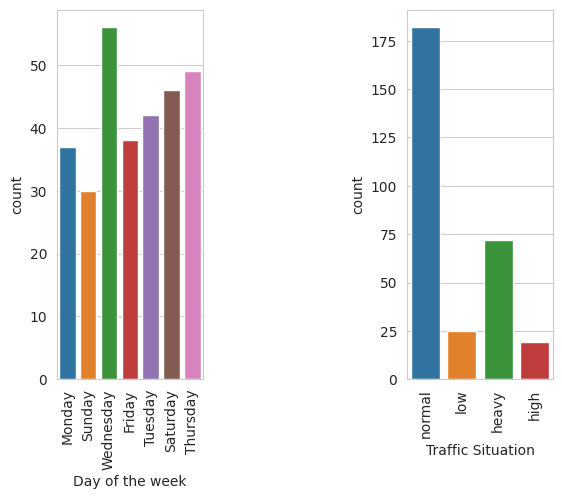

In [37]:
plt.subplot(1, 3, 1)
sns.countplot(x = test["Day of the week"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = test["Traffic Situation"])
plotter.xticks(rotation = 90);
plt.show()

In [38]:
df_temp=test_temp
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
test_temp=df_temp
test_temp


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,10:30:00 PM,23,1,12,0,0,22,34,1
1,9:30:00 AM,15,7,64,12,27,8,111,1
2,12:30:00 AM,18,3,20,5,0,10,35,0
3,5:00:00 AM,13,5,58,13,4,15,90,1
4,1:15:00 PM,20,5,161,50,10,0,221,3
...,...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97,1
294,10:00:00 PM,9,4,17,4,1,20,42,1
295,9:45:00 PM,21,7,82,16,14,34,146,2
296,6:00:00 PM,29,7,112,13,37,6,168,3


In [39]:
test_temp = test_temp.drop(columns=['Traffic Situation'],axis=1)
test_temp

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,10:30:00 PM,23,1,12,0,0,22,34
1,9:30:00 AM,15,7,64,12,27,8,111
2,12:30:00 AM,18,3,20,5,0,10,35
3,5:00:00 AM,13,5,58,13,4,15,90
4,1:15:00 PM,20,5,161,50,10,0,221
...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97
294,10:00:00 PM,9,4,17,4,1,20,42
295,9:45:00 PM,21,7,82,16,14,34,146
296,6:00:00 PM,29,7,112,13,37,6,168


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_temp['Time'] = le.fit_transform(test_temp['Time'])
test_temp=test_temp.drop(columns=['Day of the week',"Date"],axis=1)
test_temp

,Time,CarCount,BikeCount,BusCount,TruckCount,Total
0,5,12,0,0,22,34
1,87,64,12,27,8,111
2,20,20,5,0,10,35
3,55,58,13,4,15,90
4,27,161,50,10,0,221
...,...,...,...,...,...,...
293,55,70,6,7,14,97
294,1,17,4,1,20,42
295,90,82,16,14,34,146
296,63,112,13,37,6,168


In [41]:
test_row = test_temp.shape[0]
test_row 

298

In [42]:
import_train = X.reset_index(drop=True)
import_train

,Time,CarCount,BikeCount,BusCount,TruckCount,Total
0,41,14,16,9,14,53
1,51,104,31,37,6,178
2,37,91,22,34,8,155
3,44,18,2,1,27,48
4,89,105,14,13,32,164
...,...,...,...,...,...,...
2673,18,19,2,0,22,43
2674,90,24,18,37,18,97
2675,38,19,2,1,12,34
2676,32,12,3,0,39,54


In [43]:
Row_Number=test_row 
X_test_target1_df=import_train._append(test_temp,ignore_index=True)

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
X_test_target1_df = StandardScaler.fit_transform(X_test_target1_df)
test_pred_target0= pd.DataFrame(X_test_target1_df)
test_pred_target0 = pd.DataFrame(test_pred_target0).tail(Row_Number)#tail:抓取後面資料
test_pred_target0 = test_pred_target0.reset_index(drop=True)
test_pred_target0

,0,1,2,3,4,5
0,-1.536183,-1.236756,-1.161302,-1.065552,0.629601,-1.332963
1,1.437268,-0.102449,-0.227112,0.817348,-0.690898,-0.053479
2,-0.992259,-1.062247,-0.772056,-1.065552,-0.502255,-1.316347
3,0.276897,-0.233331,-0.149263,-0.786604,-0.030648,-0.402429
4,-0.738428,2.013469,2.731155,-0.368182,-1.445469,1.774355
...,...,...,...,...,...,...
293,0.276897,0.028432,-0.694207,-0.577393,-0.124969,-0.286113
294,-1.681229,-1.127688,-0.849905,-0.995815,0.440959,-1.200030
295,1.546052,0.290195,0.084284,-0.089233,1.761458,0.528104
296,0.566989,0.944603,-0.149263,1.514719,-0.879540,0.893671


In [44]:
test_pred_target0.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [45]:
Stacking_predict=stacking_model.predict(test_pred_target0.values)

In [46]:
#DataFrame
Stacking_predict_df=pd.DataFrame(Stacking_predict)

#rename lable
Stacking_predict_df=Stacking_predict_df.set_axis(axis=1,labels=['Stack_pred'])

#merge predict
test_pred=test.merge(Stacking_predict_df,how='inner',left_index=True,right_index=True)
test_pred

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Stack_pred
0,10:30:00 PM,23,1,12,0,0,22,34,1,1
1,9:30:00 AM,15,7,64,12,27,8,111,1,1
2,12:30:00 AM,18,3,20,5,0,10,35,0,0
3,5:00:00 AM,13,5,58,13,4,15,90,1,1
4,1:15:00 PM,20,5,161,50,10,0,221,3,3
...,...,...,...,...,...,...,...,...,...,...
293,5:00:00 AM,20,5,70,6,7,14,97,1,1
294,10:00:00 PM,9,4,17,4,1,20,42,1,1
295,9:45:00 PM,21,7,82,16,14,34,146,2,2
296,6:00:00 PM,29,7,112,13,37,6,168,3,3


# Accuracy

stacking accuracy is: 100.000%


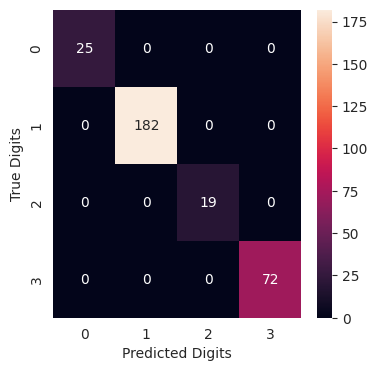

In [47]:
stacking_acc = accuracy_score(test_pred['Traffic Situation'], test_pred['Stack_pred'])
print("stacking accuracy is: {0:.3f}%".format(stacking_acc * 100))
cm = confusion_matrix(test_pred['Traffic Situation'], test_pred['Stack_pred'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

**➡️ It's great. We obtained 100% accuracy on the evaluation test set.**